# Lending Club Default Analysis


Guide: 

- Looking at Big Picture
- Get the data
- Data Exploration (Discover and Visualize the data to gain insights)
- Prepare the data for ML Algos
- Select a model and train it
- Fine-tune your model
- Evaulate your model
- Present your solution
- Test on new data
- Monitor/maintain your system



# Looking at the Big Picture

LendingClub is one of the world’s largest online marketplace that connects borrowers and investors. Lending Club have reinvented the way people access credit. LendingClub makes credit more affordable and investing more rewarding. They strive to provide a better financial future for everyone by building a marketplace that keeps costs low and investor opportunity high.

Goal: Analyze LendingClub data to predict whether a borrower will default

Problem:
LendingClub performs underwriting in a way that is different from a traditional bank. LendingClub screens the borrowers through the information that they have provided and evaluates the loan decision based on that information. LendingClub then assigns a rating to the loan and determines the interest rate on the loan. LendingClub then puts the loan on the marketplace where investors are able to evaluate the loan and invest. The main problem that we are trying to solve is to improve the credit scoring system of LendingClub using machine learning algorithms to predict whether a borrower will default on the loan. It is essential for LendingClub to access the validity of a loan to assign an accurate rating so that investors are provided with an accurate estimation. Otherwise, investors would be unlikely to invest on the platform.

# Get the Data

#### Import libraries

In [814]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)   #look at all the columns
sns.set(style="ticks", color_codes=True)
from sklearn import preprocessing


###### Visually better graphs


In [815]:

from matplotlib import rcParams
import matplotlib as mpl

blue = '#3498DB'
gray = '#95A5A6'
red = '#E74C3C'
dark_gray = '#34495E'
green = '#2ECC71'
purple = '#9B59B6'
flatui = [blue, gray, red, dark_gray, green, purple]

# Patches
mpl.rc('patch', 
       linewidth=0.5, 
       facecolor=dark_gray, 
       edgecolor='w', 
       force_edgecolor=True, 
       antialiased=True)    
  
# Figure
mpl.rc('figure', 
       figsize= (10, 6),
       facecolor='w', 
       edgecolor='w', 
       titlesize='xx-large',
       titleweight=700)

# Grid
mpl.rc('grid', 
       color=dark_gray,
       alpha=0.5, 
       linewidth=0.5, 
       linestyle='-')

# Axes
mpl.rc('axes', 
       facecolor='w',
       edgecolor=dark_gray,
       linewidth=0.5,
       grid=True,
       titlesize='large',
       labelsize='large',
       labelcolor=dark_gray,
       axisbelow=True)

mpl.rc('axes.spines',
       right=False,
       top=False)

# Ticks
mpl.rc('xtick', 
       direction='out',
       color=dark_gray)

mpl.rc('xtick.major', 
       size=0.0)

mpl.rc('xtick.minor', 
       size=0.0)

mpl.rc('ytick', 
       direction='out',
       color=dark_gray)

mpl.rc('ytick.major', 
       size=0.0)

mpl.rc('ytick.minor', 
       size=0.0)

mpl.rc('legend', 
       frameon=False,
       numpoints=1,
       scatterpoints=1)

mpl.rc('font', 
       size=13,
       weight=400,
       family='sans-serif')

rcParams['font.sans-serif']: ['Helvetica', 'Verdana', 'Lucida Grande']

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)


###### Read in the file


In [816]:
df = pd.read_csv('loan.csv', low_memory=False)

# Data Exploration

###### Quick look at the data structure

Each row represents a singular loan. 
There are 74 features with 887379 instances. They are a mixture of object, int and float data types

In [817]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#There are features with lots of missing instances will need to take of care of later

In [818]:
df.info()

#887379 instances with 74 features in the initial dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [819]:
print((df['inq_fi'].count()/887379)*100)
print((df['dti_joint'].count()/887379)*100)

#only 2.4% of data in columns inq_fi, total_cu_tl,inq_last_12m etc
#0.05% of data in dti joinm annual_inc_joint etc
#need to remove such features

2.4084410381584416
0.05735993301621968


###### Dropping the Columns that give no information or are missing majority of data

In [820]:

drop_columns= ['inq_last_12m','total_cu_tl','inq_fi','all_util','max_bal_bc','open_rv_24m','open_rv_12m','il_util',
              'total_bal_il','mths_since_rcnt_il','open_il_24m','open_il_12m','open_il_6m','open_acc_6m',
              'verification_status_joint','dti_joint','annual_inc_joint','mths_since_last_major_derog',
              'mths_since_last_record','desc','mths_since_last_delinq','next_pymnt_d','earliest_cr_line','out_prncp',
               'last_credit_pull_d','tot_coll_amt','tot_cur_bal','last_pymnt_d',
               'collections_12_mths_ex_med','acc_now_delinq']



df = df.drop(drop_columns, axis=1)                   

###### Features that will be troublesome and cause overfitting because they are unique:id,url,zip_code


In [821]:
bad_features = ['id','url','zip_code','member_id']

df=df.drop(bad_features,axis=1)


In [822]:
len(df.columns) #40 columns now

40

In [823]:
df.head() #quick check if columns are dropped

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,total_rev_hi_lim
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,1.0,INDIVIDUAL,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,GA,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1.0,INDIVIDUAL,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,1.0,INDIVIDUAL,NaN
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,CA,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,1.0,INDIVIDUAL,NaN
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,1.0,INDIVIDUAL,NaN


In [824]:
#Get a feel for the distributions of loan amount, interest rate, annual income

In [825]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,total_rev_hi_lim
count,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.0,8.171030e+05
mean,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,1.0,3.206862e+04
std,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.0,3.749826e+04
min,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,1.0,1.390000e+04
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,1.0,2.370000e+04
75%,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,1.000000,14.000000,0.000000,2.082900e+04,73.600000,32.000000,13654.050000,10616.814231,10565.690000,8000.000000,2238.265000,0.000000,0.000000,0.000000,831.245000,1.0,3.980000e+04
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,33.000000,90.000000,86.000000,2.904836e+06,892.300000,169.000000,49372.860000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36475.590000,1.0,9.999999e+06


In [826]:
df.isnull().any()

loan_amnt                  False
funded_amnt                False
funded_amnt_inv            False
term                       False
int_rate                   False
installment                False
grade                      False
sub_grade                  False
emp_title                   True
emp_length                  True
home_ownership             False
annual_inc                  True
verification_status        False
issue_d                    False
loan_status                False
pymnt_plan                 False
purpose                    False
title                       True
addr_state                 False
dti                        False
delinq_2yrs                 True
inq_last_6mths              True
open_acc                    True
pub_rec                     True
revol_bal                  False
revol_util                  True
total_acc                   True
initial_list_status        False
out_prncp_inv              False
total_pymnt                False
total_pymn

In [827]:
len(df.emp_title.unique())

#133,191 unique employee titles, thus we can remove as a database of 250,000 it will provide no info and lead to overfitting

299272

In [828]:
df = df.drop('emp_title',axis=1)

In [829]:
df.pymnt_plan.value_counts()

#again no need to keep this feature as it adds no value our model

n    887369
y        10
Name: pymnt_plan, dtype: int64

In [830]:
df = df.drop('pymnt_plan',axis=1)

### Visual EDA

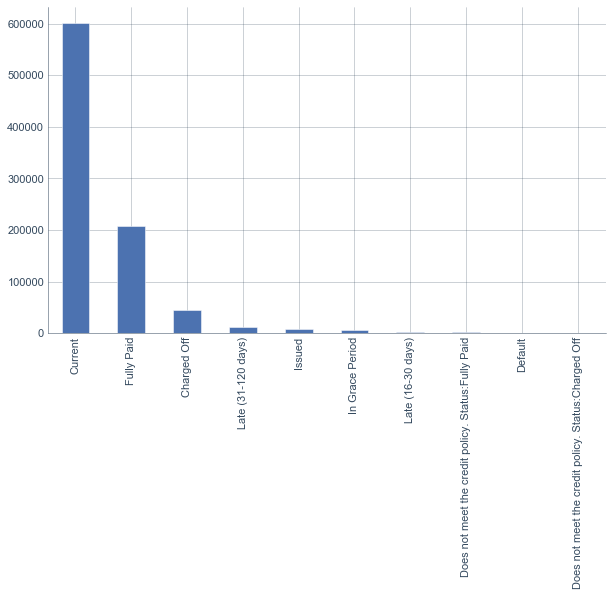

In [831]:
df['loan_status'].value_counts().plot(kind='bar')

#interesting, since our goal is to figure out whether a new borrower will default or not we have to compare
#our target variable is loan status with a binary value:default or no default
#fully paid off vs (charged off & defaulted)
#The current loan status are still ongoing and we don't know the end result

#Loans that are in "Default" are loans for which borrowers have failed 
#to make payments for an extended period of time.

#Charge Off typically occurs when a loan is 120 days or more past due and 
#there is no reasonable expectation of sufficient payment to prevent the charge off.

In [832]:
#drop categories not needed in loan status

cat_drop= ['Current','Late','Issued','In Grace Period','Late(16-30 days)','Does not meet the credit policy. Status:Charged Off','Does not meet the credit policy. Status:Fully Paid']
df = df.loc[~((df['loan_status']=='Current') | (df['loan_status']=='Late') | (df['loan_status']=='In Grace Period')| (df['loan_status']=='Late(16-30 days)') |(df['loan_status']=='Does not meet the credit policy. Status:Charged Off') |(df['loan_status']=='Does not meet the credit policy. Status:Fully Paid') | (df['loan_status']=='Late (31-120 days)') | (df['loan_status']=='Issued') | (df['loan_status']=='Late (16-30 days)') ),:]



In [833]:
#make charged off to default
df['loan_status'] = df['loan_status'].replace({'Charged Off':'Default'}) #add in Data wrangling


In [834]:
#check to see our modificiation is working
df['loan_status'].value_counts()

Fully Paid    207723
Default        46467
Name: loan_status, dtype: int64

In [835]:
loan_status_count = df['loan_status'].value_counts()
fullypaid_count=loan_status_count[0]
default_count=loan_status_count[1]
default_rate = default_count/fullypaid_count
print('The default ratio in our dataset of fully paid vs defaulted is %f' %(default_rate*100))

The default ratio in our dataset of fully paid vs defaulted is 22.369694


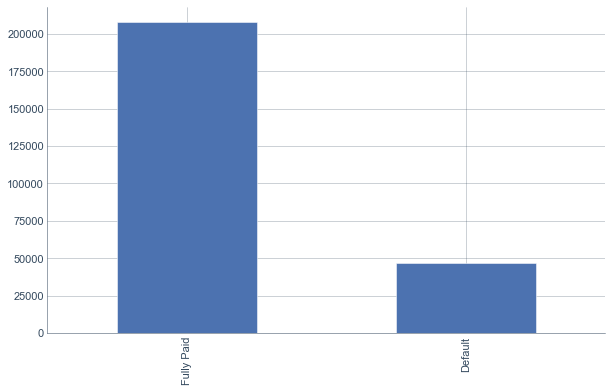

In [836]:
df.loan_status.value_counts().plot(kind='bar')

#slightly imbalanced dataset

In [837]:
df_default=df[df['loan_status'] == 'Default']
df_fullypaid = df[df['loan_status'] == 'Fully Paid']

#seperate the defaulted and fully paid for analysis and EDA

Text(0.5, 1.0, 'Grades of Loans of Fully Paid')

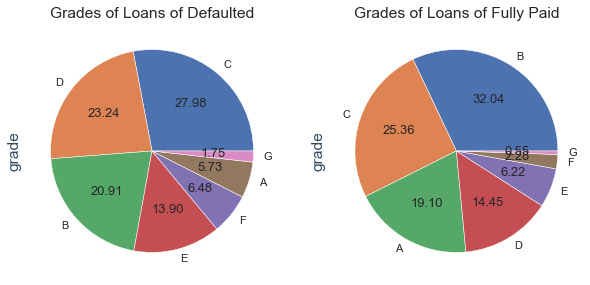

In [838]:
plt.subplots(1,2)

plt.subplot(121)
df_default['grade'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Grades of Loans of Defaulted')

plt.subplot(122)
df_fullypaid['grade'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Grades of Loans of Fully Paid')

#Majority of the grades of defaulted loans are D,C & B

Text(0.5, 1.0, 'Term Length of Loans of Fully Paid')

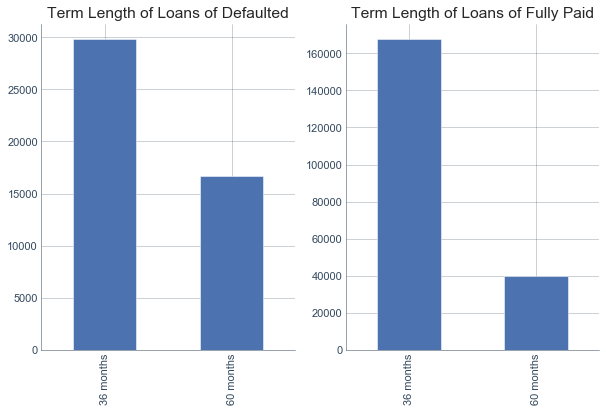

In [839]:
plt.subplots(1,2)

plt.subplot(121)
df_default['term'].value_counts().plot(kind='bar')
plt.title('Term Length of Loans of Defaulted')

plt.subplot(122)
df_fullypaid['term'].value_counts().plot(kind='bar')
plt.title('Term Length of Loans of Fully Paid')

#the proportion for defaulted terms loans are higher for 36 months

/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"
/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Home Ownership of Fully Paid')

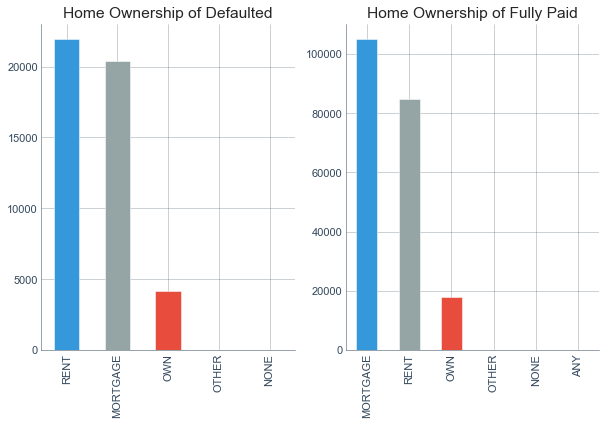

In [840]:
plt.subplots(1,2)

plt.subplot(121)
df_default['home_ownership'].value_counts().plot(kind='bar',colors=flatui)
plt.title('Home Ownership of Defaulted')

plt.subplot(122)
df_fullypaid['home_ownership'].value_counts().plot(kind='bar',colors=flatui)
plt.title('Home Ownership of Fully Paid')

#very interesting, a major category of defaulted home owners are renters- most likely can't afford a mortgage on top of it as well

Text(0, 0.5, 'Frequency')

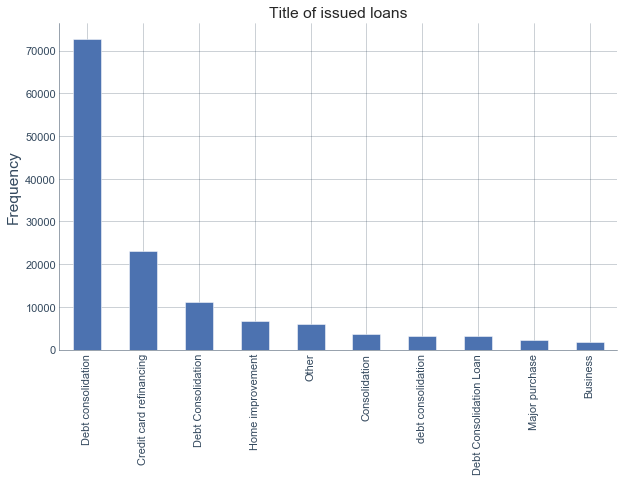

In [841]:
df['title'].value_counts().head(10).plot(kind="bar")
plt.title('Title of issued loans')
plt.ylabel('Frequency')

In [842]:
len(df.title.unique())


47974

In [843]:
df = df.drop('title',axis=1)

Text(0.5, 1.0, 'Distribution of Loan Amount Applied by Borrowers')

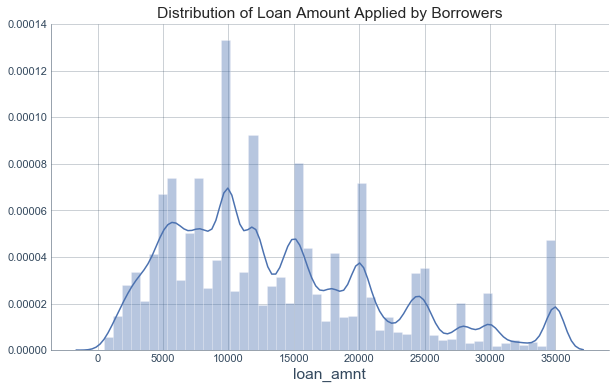

In [844]:
sns.distplot(df['loan_amnt']).set_title('Distribution of Loan Amount Applied by Borrowers')

#distribution of loan amount applied by borrowers

Text(0.5, 1.0, 'Distribution of Interest Rate for the Borrowers')

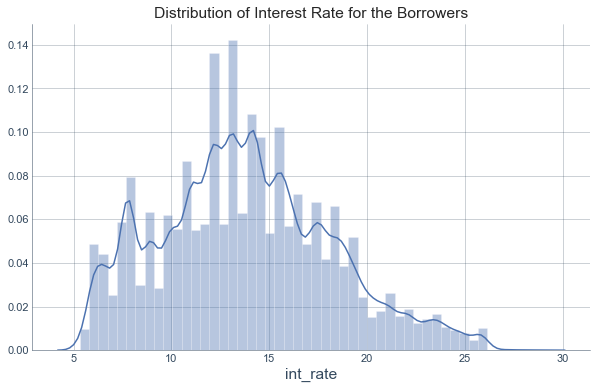

In [845]:
y=df['int_rate']
sns.distplot(y).set_title('Distribution of Interest Rate for the Borrowers')

In [846]:
df_default.describe() #interestingly higher mean of loan_amnt, higher interest rate, more accounts

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,total_rev_hi_lim
count,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,4.646700e+04,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,4.646700e+04,46419.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.0,3.643000e+04
mean,14573.018486,14528.669271,14411.372330,16.019092,441.073219,6.512892e+04,18.444234,0.278757,0.980309,11.061721,0.146943,1.499084e+04,59.443002,24.229044,304.091257,6358.551737,6298.114431,3333.515304,2155.160268,2.440093,867.436067,91.206597,454.998240,1.0,2.640412e+04
std,8391.928489,8366.116179,8390.706853,4.301283,246.793319,5.686452e+04,7.950591,0.799408,1.127832,4.934646,0.449553,1.741112e+04,23.479084,11.532493,2218.740041,5424.353661,5400.665726,3292.831378,2243.479601,10.067126,1559.671060,253.065131,650.022043,0.0,2.541921e+04
min,900.000000,900.000000,0.000000,5.420000,21.620000,4.080000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,13.050000,265.810000,4.000000e+04,12.610000,0.000000,0.000000,8.000000,0.000000,6.226500e+03,43.200000,16.000000,0.000000,2496.360000,2455.050000,1105.880000,686.065000,0.000000,0.000000,0.000000,237.850000,1.0,1.240000e+04
50%,12700.000000,12600.000000,12400.000000,15.800000,391.170000,5.600000e+04,18.380000,0.000000,1.000000,10.000000,0.000000,1.134900e+04,61.600000,23.000000,0.000000,4855.880000,4792.810000,2324.110000,1434.080000,0.000000,16.250000,0.000000,375.880000,1.0,2.050000e+04
75%,20000.000000,20000.000000,19975.000000,18.920000,573.320000,7.800000e+04,24.140000,0.000000,2.000000,14.000000,0.000000,1.921300e+04,78.000000,31.000000,0.000000,8606.465000,8530.180000,4455.390000,2778.530000,0.000000,1214.165000,24.915500,568.700000,1.0,3.320000e+04
max,35000.000000,35000.000000,35000.000000,28.990000,1424.570000,8.706582e+06,39.980000,18.000000,8.000000,76.000000,12.000000,1.746716e+06,129.400000,110.000000,35000.000000,46199.440000,46162.550000,34483.270000,20610.170000,358.680000,33520.270000,7002.190000,34833.350000,1.0,1.998700e+06


In [847]:
df_fullypaid.describe() 

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,total_rev_hi_lim
count,207723.000000,207723.000000,207723.000000,207723.000000,207723.000000,2.077230e+05,207723.000000,207723.000000,207723.000000,207723.000000,207723.000000,2.077230e+05,207571.000000,207723.000000,207723.0,207723.000000,207723.000000,207723.000000,207723.000000,207723.000000,207723.0,207723.0,207723.000000,207723.0,1.540340e+05
mean,13346.350910,13306.858172,13219.787151,13.274244,413.172899,7.416175e+04,16.139156,0.244219,0.823919,10.917944,0.143090,1.521041e+04,53.187323,25.218093,0.0,15186.680773,15081.305566,13283.934697,1902.410501,0.335583,0.0,0.0,7770.242299,1.0,3.047313e+04
std,8057.388288,8035.909683,8053.805339,4.268371,244.199337,5.908066e+04,7.696190,0.728877,1.050899,4.883557,0.434046,1.903250e+04,24.924804,11.789864,0.0,9446.055451,9456.822383,8037.754633,2022.816723,3.574886,0.0,0.0,7508.104201,0.0,3.033278e+04
min,500.000000,500.000000,0.000000,5.320000,15.690000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.000000e+00
25%,7200.000000,7150.000000,7000.000000,10.160000,234.360000,4.500000e+04,10.420000,0.000000,0.000000,7.000000,0.000000,5.786000e+03,34.900000,17.000000,0.0,8056.396456,7931.415000,7075.000000,619.300000,0.000000,0.0,0.0,1555.190000,1.0,1.350000e+04
50%,12000.000000,12000.000000,11725.000000,13.110000,360.080000,6.416200e+04,15.750000,0.000000,0.000000,10.000000,0.000000,1.084800e+04,54.500000,24.000000,0.0,12963.170000,12868.260000,11999.970000,1284.800000,0.000000,0.0,0.0,5749.590000,1.0,2.270000e+04
75%,18000.000000,18000.000000,18000.000000,15.810000,540.560000,9.000000e+04,21.480000,0.000000,1.000000,13.000000,0.000000,1.904100e+04,72.800000,32.000000,0.0,20538.335773,20430.315000,18000.000000,2428.315000,0.000000,0.0,0.0,11663.590000,1.0,3.780000e+04
max,35000.000000,35000.000000,35000.000000,28.990000,1409.990000,7.141778e+06,57.140000,29.000000,8.000000,58.000000,15.000000,1.743266e+06,892.300000,150.000000,0.0,57777.579870,57777.580000,35000.030000,22777.580000,286.747566,0.0,0.0,36475.590000,1.0,2.013133e+06


/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


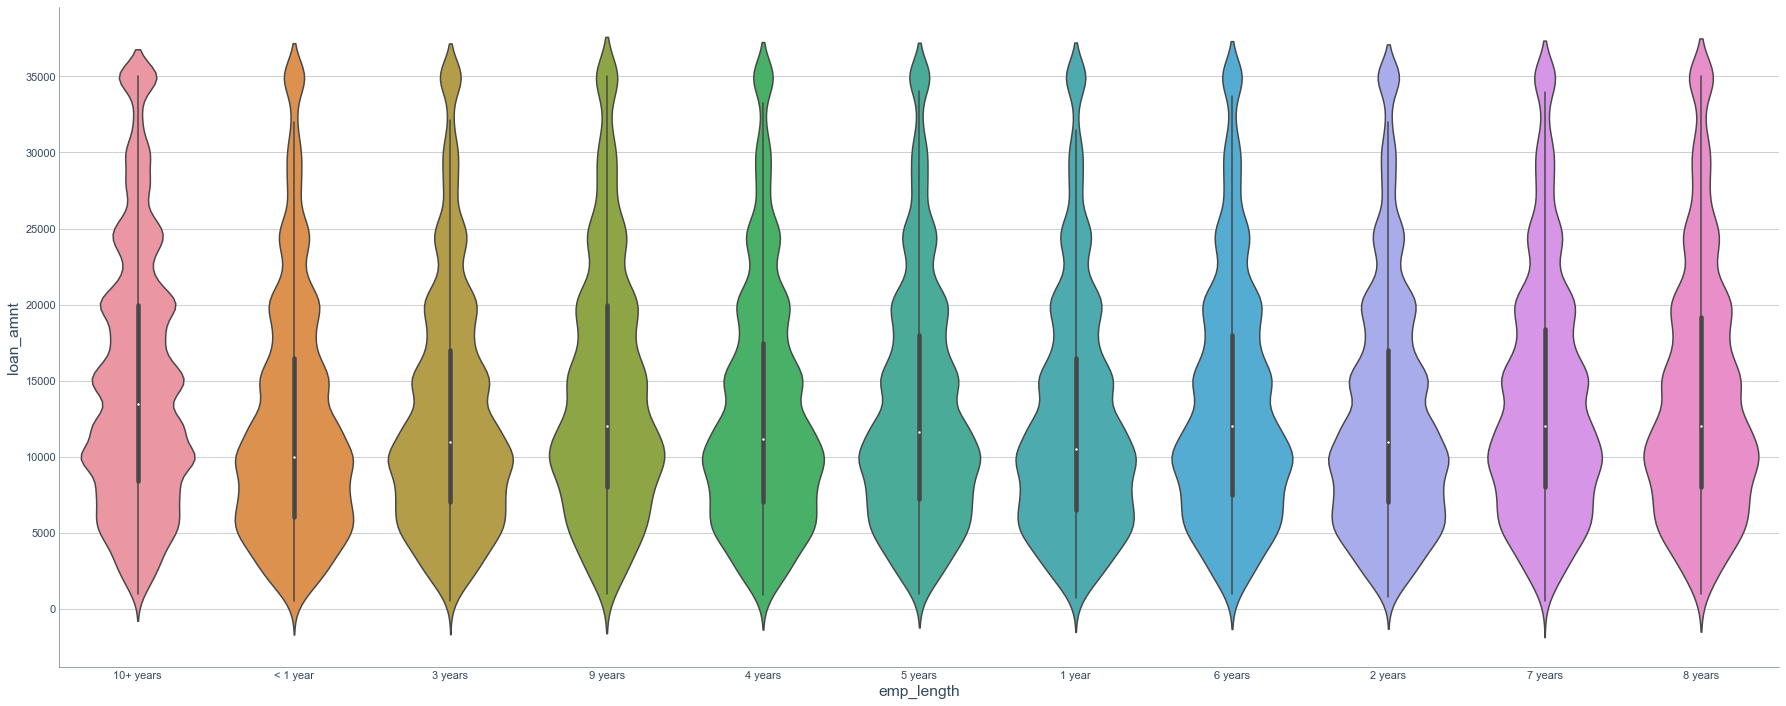

In [848]:
sns.catplot(x="emp_length", y="loan_amnt",
            kind="violin", split=False, data=df, size=10, aspect=2.5)

#when years are low the tails are thin as it should be as they have worked less and have lower chance of paying back
#high loan amounts

/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


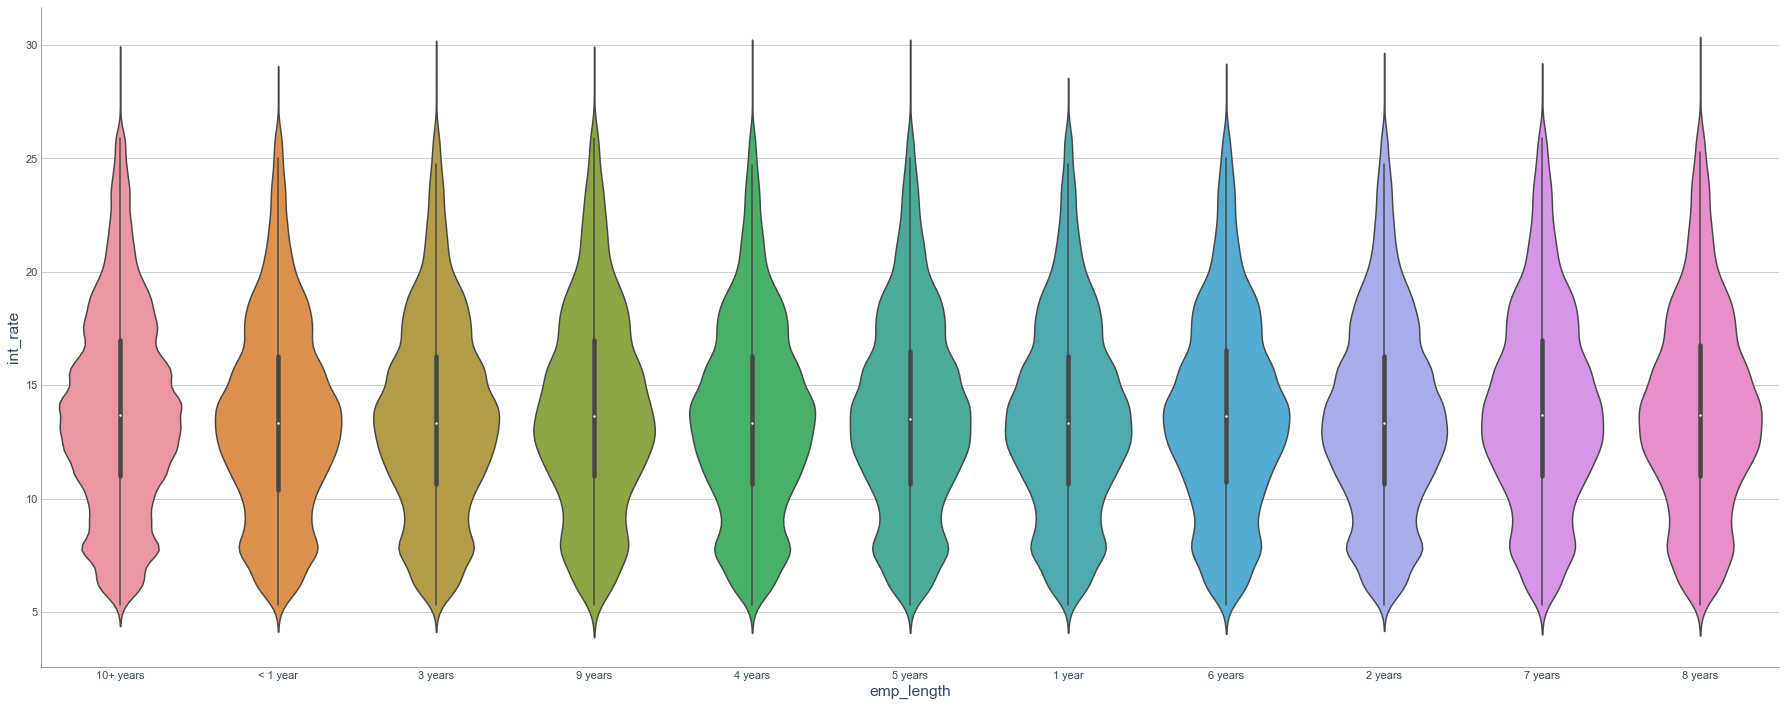

In [849]:
sns.catplot(x="emp_length", y="int_rate",
            kind="violin", split=False, data=df, size=10, aspect=2.5);

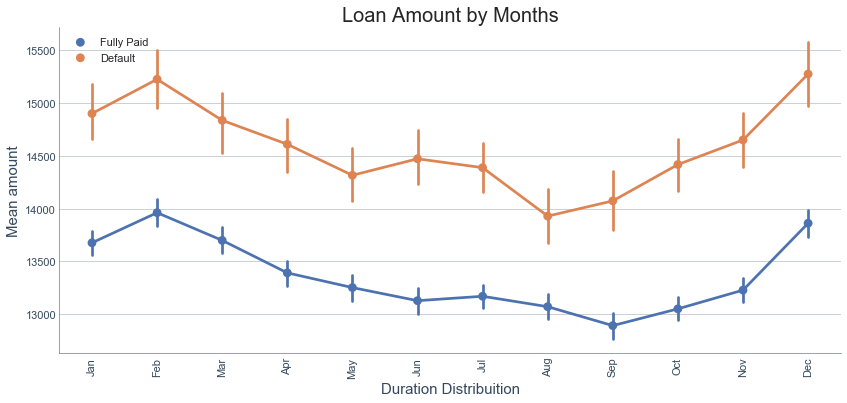

In [850]:
df['issue_month'], df['issue_year'] = df['issue_d'].str.split('-', 1).str

months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

df['issue_month'] = pd.Categorical(df['issue_month'],categories=months_order, ordered=True)

#Issue_d x loan_amount
plt.figure(figsize = (14,6))

g = sns.pointplot(x='issue_month', y='loan_amnt', 
                  data=df, 
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)
g.legend(loc='best')
g.set_title("Loan Amount by Months", fontsize=20)
plt.show()

#again its interesting that lending increases after Sept, quite possible because of holiday/shopping season
#and that end of year is approaching-maybe people are consolding their debts going into the new year
#months of the year could be a feature to utilize

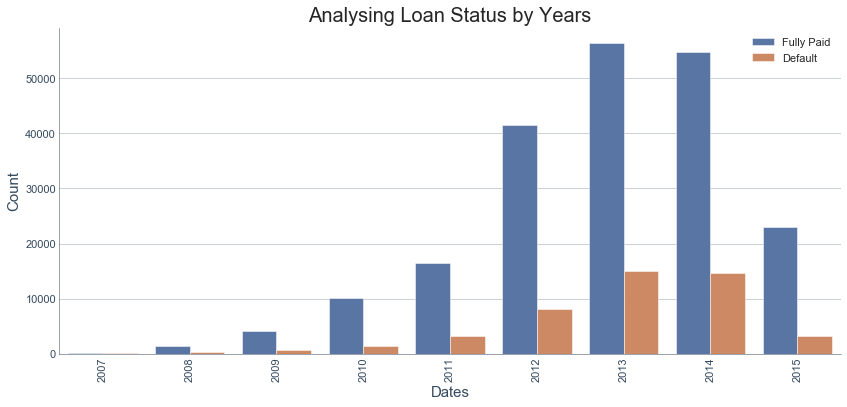

In [851]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x='issue_year', data=df,
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='best')
g.set_title("Analysing Loan Status by Years", fontsize=20)
plt.show()

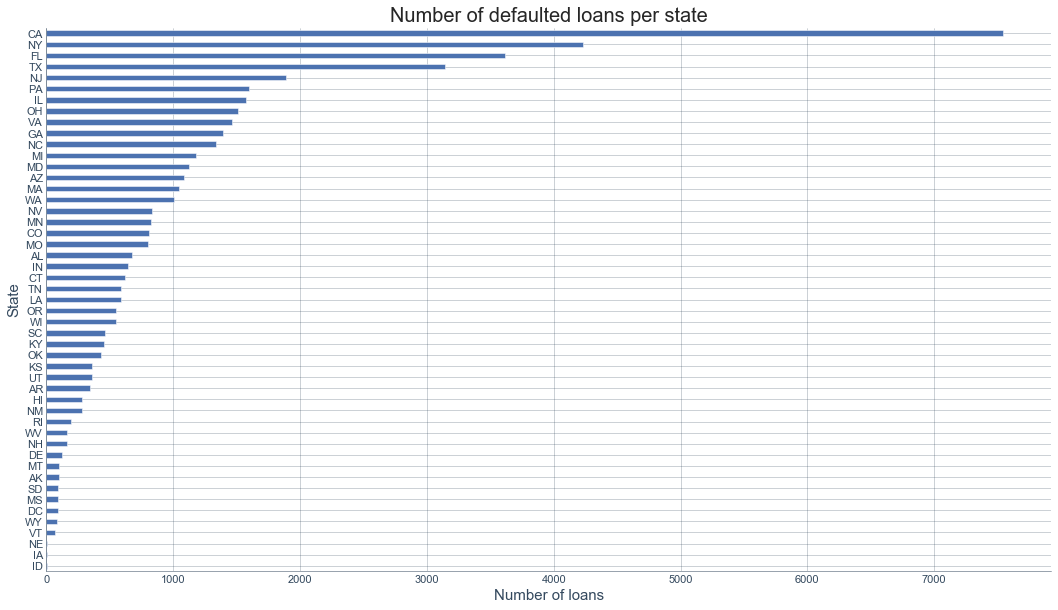

In [852]:
fig = plt.figure(figsize=(18,10))
df[df['loan_status']=='Default'].groupby('addr_state')['loan_status'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per state',fontsize=20);



Text(0.5, 1.0, 'Interest Rate/ Annual Income (20K)')

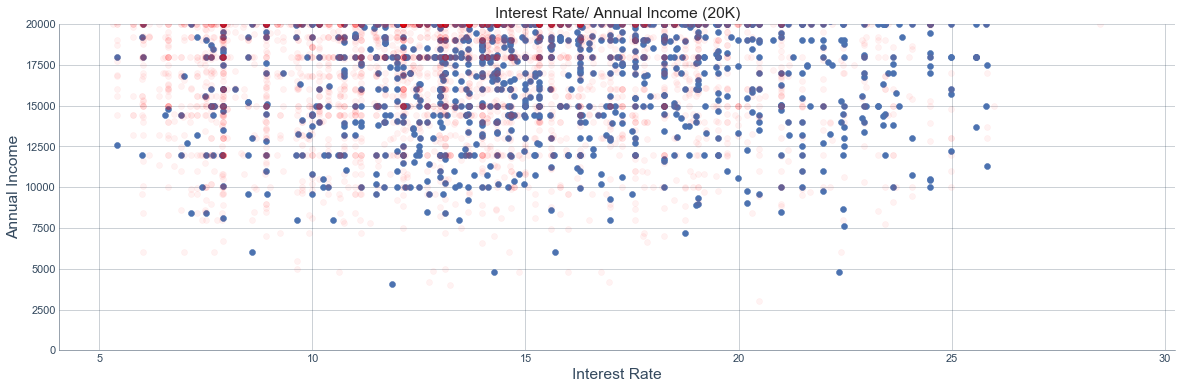

In [853]:
plt.figure(figsize=(20,6))
plt.scatter(df_default['int_rate'],df_default['annual_inc'],alpha = 1)
plt.scatter(df_fullypaid['int_rate'],df_fullypaid['annual_inc'],alpha = 0.05, color='red')
plt.ylim(0,20000)
plt.xlabel('Interest Rate')
plt.ylabel('Annual Income')
plt.title('Interest Rate/ Annual Income (20K)')

#ignore

Text(0.5, 1.0, 'Interest Rate/ Annual Income')

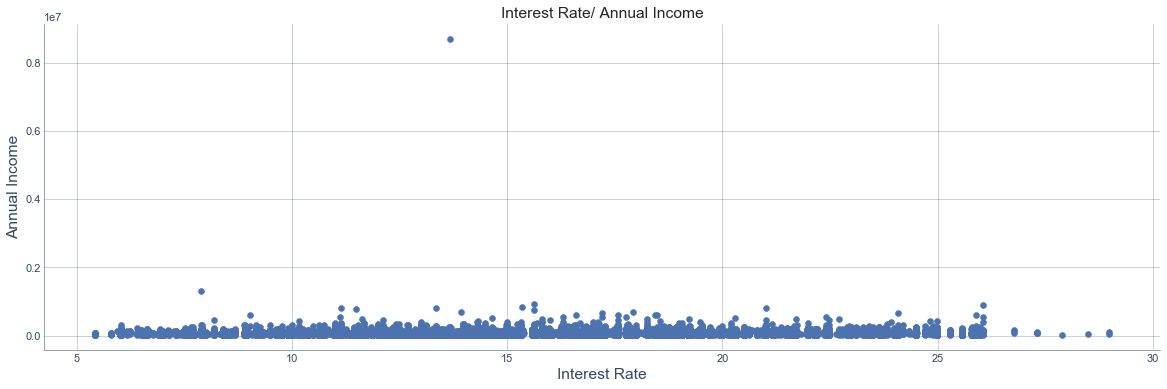

In [854]:
plt.figure(figsize=(20,6))
plt.scatter(df_default['int_rate'],df_default['annual_inc'],alpha = 1)
#plt.ylim(0,20000)
plt.xlabel('Interest Rate')
plt.ylabel('Annual Income')
plt.title('Interest Rate/ Annual Income')

#1 outliers

In [855]:
keep_columns = ['tot_coll_amt','tot_cur_bal','loan_status']
df.loc[:,keep_columns]

#checking to see whether or not to keep tot_coll_amt & tot_cur_bal

/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,tot_coll_amt,tot_cur_bal,loan_status
0,NaN,NaN,Fully Paid
1,NaN,NaN,Default
2,NaN,NaN,Fully Paid
3,NaN,NaN,Fully Paid
5,NaN,NaN,Fully Paid
7,NaN,NaN,Fully Paid
8,NaN,NaN,Default
9,NaN,NaN,Default
10,NaN,NaN,Fully Paid
11,NaN,NaN,Fully Paid


## Statistics

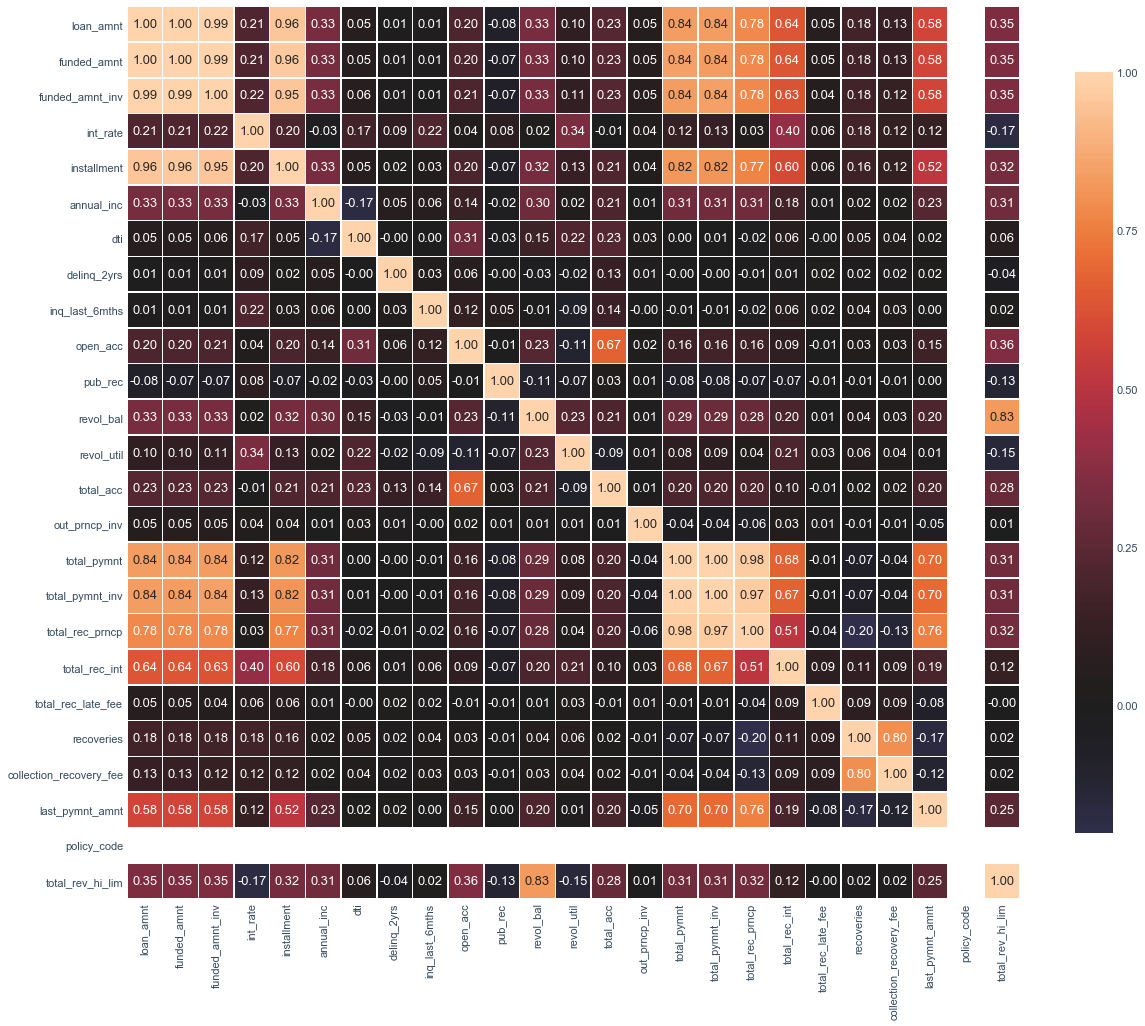

In [856]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df)


#remove funded_amnt, funded_amnt_inv, total_pymnt,installement, total_pymnt, total_pymnt_inv,

In [857]:
highly_corr_columns=['funded_amnt', 'funded_amnt_inv','installment','policy_code','total_pymnt_inv','collection_recovery_fee','total_rev_hi_lim','out_prncp_inv','total_rec_prncp','total_pymnt','issue_d']
df = df.drop(highly_corr_columns, axis = 1)
df

#got rid of highly correlated features with a threshold of +/-0.8 or higher 

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,application_type,issue_month,issue_year
0,5000.0,36 months,10.65,B,B2,10+ years,RENT,24000.00,Verified,Fully Paid,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,83.70,9.0,f,861.07,0.00,0.00,171.62,INDIVIDUAL,Dec,2011
1,2500.0,60 months,15.27,C,C4,< 1 year,RENT,30000.00,Source Verified,Default,car,GA,1.00,0.0,5.0,3.0,0.0,1687.0,9.40,4.0,f,435.17,0.00,117.08,119.66,INDIVIDUAL,Dec,2011
2,2400.0,36 months,15.96,C,C5,10+ years,RENT,12252.00,Not Verified,Fully Paid,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956.0,98.50,10.0,f,603.65,0.00,0.00,649.91,INDIVIDUAL,Dec,2011
3,10000.0,36 months,13.49,C,C1,10+ years,RENT,49200.00,Source Verified,Fully Paid,other,CA,20.00,0.0,1.0,10.0,0.0,5598.0,21.00,37.0,f,2209.33,16.97,0.00,357.48,INDIVIDUAL,Dec,2011
5,5000.0,36 months,7.90,A,A4,3 years,RENT,36000.00,Source Verified,Fully Paid,wedding,AZ,11.20,0.0,3.0,9.0,0.0,7963.0,28.30,12.0,f,631.38,0.00,0.00,161.03,INDIVIDUAL,Dec,2011
7,3000.0,36 months,18.64,E,E1,9 years,RENT,48000.00,Source Verified,Fully Paid,car,CA,5.35,0.0,2.0,4.0,0.0,8221.0,87.50,4.0,f,938.14,0.00,0.00,111.34,INDIVIDUAL,Dec,2011
8,5600.0,60 months,21.28,F,F2,4 years,OWN,40000.00,Source Verified,Default,small_business,CA,5.55,0.0,2.0,11.0,0.0,5210.0,32.60,13.0,f,294.94,0.00,189.06,152.39,INDIVIDUAL,Dec,2011
9,5375.0,60 months,12.69,B,B5,< 1 year,RENT,15000.00,Verified,Default,other,TX,18.08,0.0,0.0,2.0,0.0,9279.0,36.50,3.0,f,533.42,0.00,269.29,121.45,INDIVIDUAL,Dec,2011
10,6500.0,60 months,14.65,C,C3,5 years,OWN,72000.00,Not Verified,Fully Paid,debt_consolidation,AZ,16.12,0.0,2.0,14.0,0.0,4032.0,20.60,23.0,f,1177.52,0.00,0.00,1655.54,INDIVIDUAL,Dec,2011
11,12000.0,36 months,12.69,B,B5,10+ years,OWN,75000.00,Source Verified,Fully Paid,debt_consolidation,CA,10.78,0.0,0.0,12.0,0.0,23336.0,67.10,34.0,f,1943.08,0.00,0.00,6315.30,INDIVIDUAL,Dec,2011


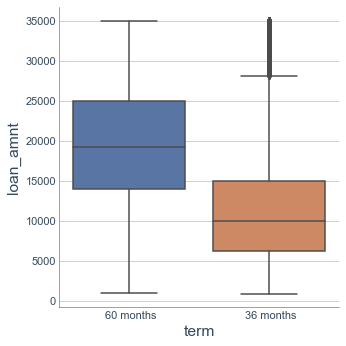

In [858]:
sns.catplot(x="term", y="loan_amnt", kind="box", data=df_default)


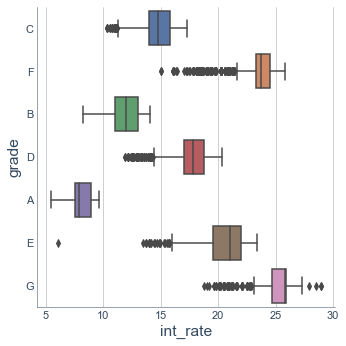

In [859]:
sns.catplot(x="int_rate", y="grade", kind="box", data=df_default)

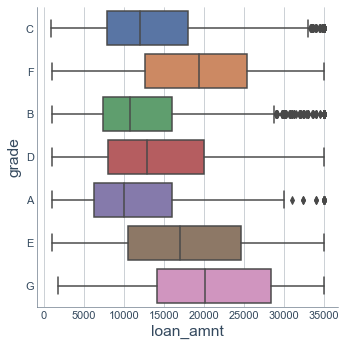

In [860]:
sns.catplot(x="loan_amnt", y="grade", kind="box", data=df_default)

/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


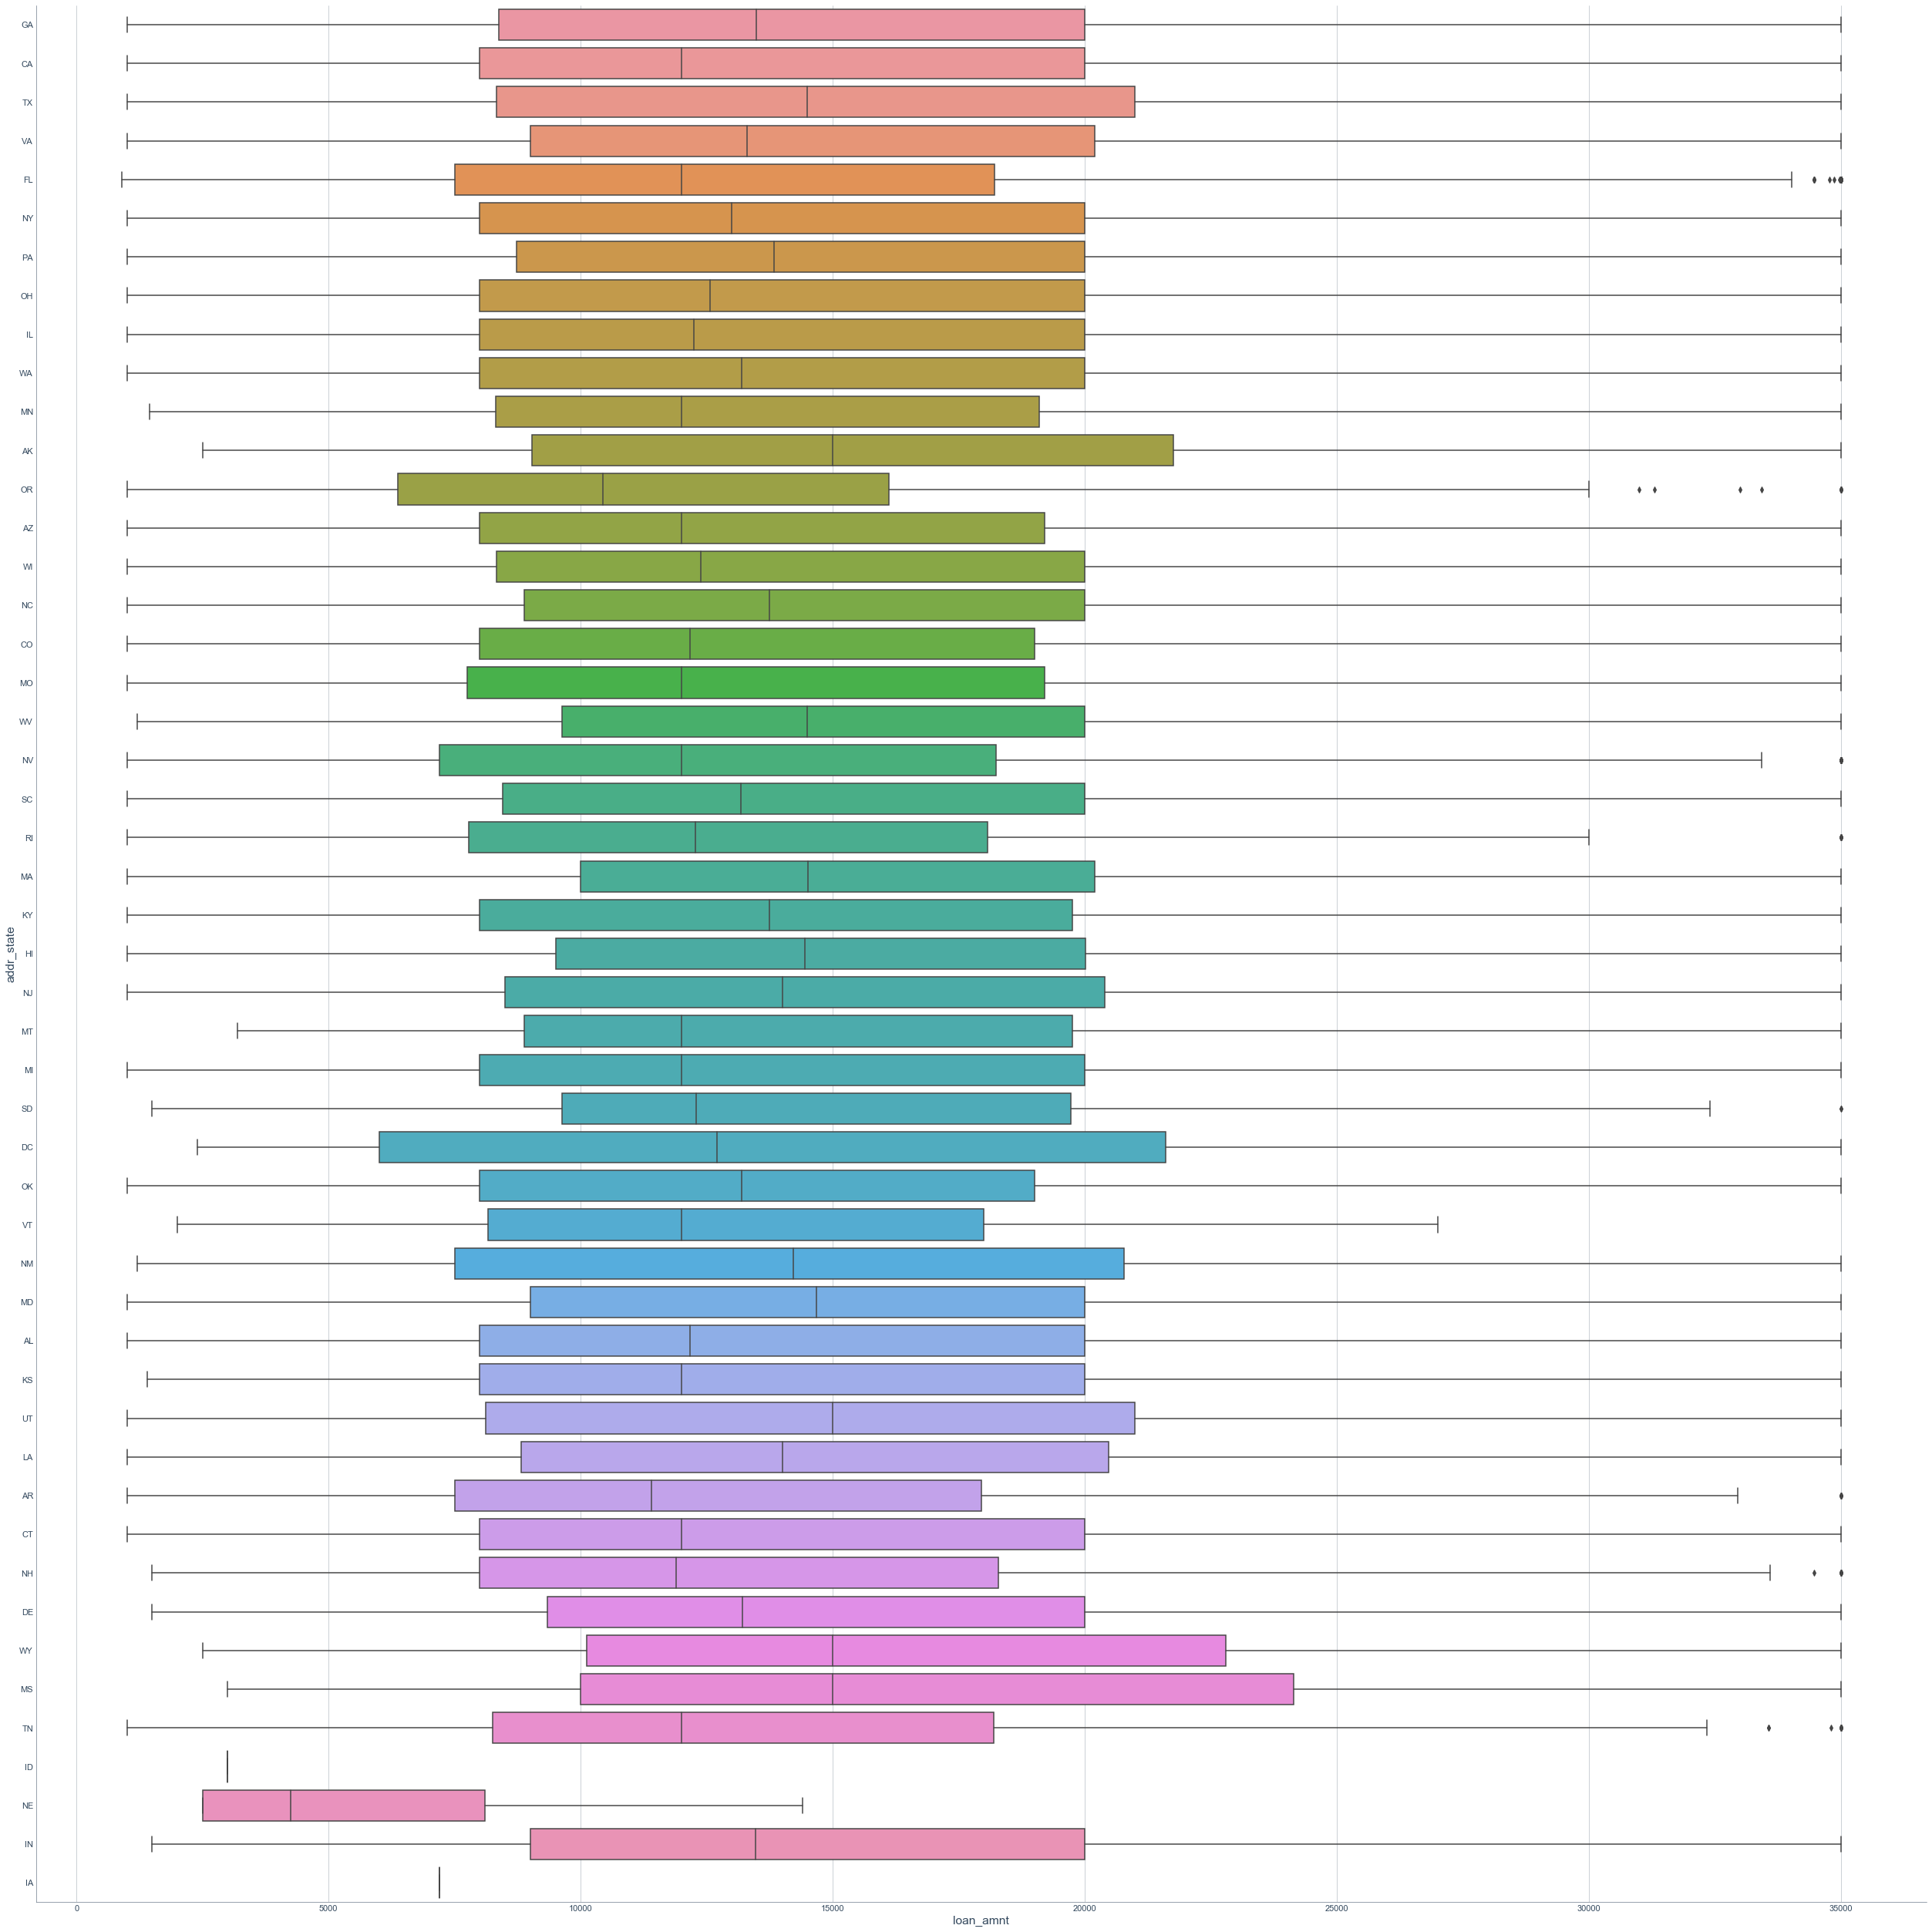

In [861]:
sns.catplot(x="loan_amnt", y="addr_state", kind="box", data=df_default, size=35, aspect=1)

In [862]:
df.tail(100)

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,application_type,issue_month,issue_year
886708,14400.0,60 months,11.44,B,B4,10+ years,RENT,47000.0,Verified,Fully Paid,debt_consolidation,NY,5.56,0.0,0.0,8.0,0.0,12681.0,32.7,23.0,f,1331.49,0.00,0.00,12903.45,INDIVIDUAL,Jan,2015
886711,18000.0,60 months,23.99,F,F2,7 years,RENT,48000.0,Source Verified,Default,debt_consolidation,GA,19.05,0.0,0.0,10.0,1.0,8610.0,80.5,13.0,f,2402.44,0.00,0.00,517.72,INDIVIDUAL,Jan,2015
886714,20000.0,36 months,8.19,A,A5,10+ years,OWN,60000.0,Source Verified,Fully Paid,debt_consolidation,MO,28.26,0.0,1.0,13.0,0.0,31756.0,46.7,28.0,w,1301.34,0.00,0.00,15034.64,INDIVIDUAL,Jan,2015
886730,1500.0,36 months,8.67,B,B1,3 years,MORTGAGE,45000.0,Not Verified,Fully Paid,home_improvement,GA,20.11,0.0,0.0,7.0,2.0,1953.0,17.4,20.0,f,41.62,0.00,0.00,1400.65,INDIVIDUAL,Jan,2015
886739,8000.0,36 months,8.19,A,A5,1 year,RENT,70000.0,Source Verified,Fully Paid,credit_card,VA,27.94,0.0,0.0,14.0,1.0,7913.0,36.8,45.0,w,254.70,0.00,0.00,2803.22,INDIVIDUAL,Jan,2015
886740,30000.0,36 months,6.99,A,A3,10+ years,MORTGAGE,92000.0,Verified,Fully Paid,credit_card,TX,14.91,2.0,0.0,7.0,0.0,23538.0,53.0,15.0,f,1452.45,0.00,0.00,24066.31,INDIVIDUAL,Jan,2015
886747,10000.0,36 months,14.99,C,C5,< 1 year,RENT,90000.0,Verified,Fully Paid,debt_consolidation,NY,19.58,0.0,0.0,12.0,0.0,6974.0,48.1,33.0,w,613.10,0.00,0.00,9243.32,INDIVIDUAL,Jan,2015
886765,18000.0,60 months,14.99,C,C5,10+ years,MORTGAGE,90000.0,Source Verified,Fully Paid,home_improvement,MI,12.56,0.0,0.0,6.0,2.0,3833.0,54.8,17.0,w,2113.11,0.00,0.00,12643.09,INDIVIDUAL,Jan,2015
886766,14000.0,60 months,11.99,B,B5,3 years,MORTGAGE,65000.0,Verified,Default,small_business,SC,32.37,2.0,0.0,7.0,0.0,11702.0,45.4,18.0,w,530.53,0.00,0.00,311.36,INDIVIDUAL,Jan,2015
886787,14000.0,60 months,19.99,E,E3,1 year,MORTGAGE,51700.0,Verified,Default,debt_consolidation,GA,31.38,0.0,1.0,22.0,0.0,13401.0,71.3,39.0,f,1050.09,0.00,0.00,370.84,INDIVIDUAL,Jan,2015


###### Handling Text to categorical attributes and scaling the data

In [863]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [864]:
#df.head(20)
#['term','grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose','addr_state','initial_list_status','application_type','issue_month','issue_year']

In [865]:
df.loc[:,~df.columns.isin(['term','grade','sub_grade',
                           'emp_length','home_ownership','verification_status','loan_status',
                           'purpose','addr_state','initial_list_status','application_type','issue_month',
                           'issue_year'])]

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt
0,5000.0,10.65,24000.00,27.65,0.0,1.0,3.0,0.0,13648.0,83.70,9.0,861.07,0.00,0.00,171.62
1,2500.0,15.27,30000.00,1.00,0.0,5.0,3.0,0.0,1687.0,9.40,4.0,435.17,0.00,117.08,119.66
2,2400.0,15.96,12252.00,8.72,0.0,2.0,2.0,0.0,2956.0,98.50,10.0,603.65,0.00,0.00,649.91
3,10000.0,13.49,49200.00,20.00,0.0,1.0,10.0,0.0,5598.0,21.00,37.0,2209.33,16.97,0.00,357.48
5,5000.0,7.90,36000.00,11.20,0.0,3.0,9.0,0.0,7963.0,28.30,12.0,631.38,0.00,0.00,161.03
7,3000.0,18.64,48000.00,5.35,0.0,2.0,4.0,0.0,8221.0,87.50,4.0,938.14,0.00,0.00,111.34
8,5600.0,21.28,40000.00,5.55,0.0,2.0,11.0,0.0,5210.0,32.60,13.0,294.94,0.00,189.06,152.39
9,5375.0,12.69,15000.00,18.08,0.0,0.0,2.0,0.0,9279.0,36.50,3.0,533.42,0.00,269.29,121.45
10,6500.0,14.65,72000.00,16.12,0.0,2.0,14.0,0.0,4032.0,20.60,23.0,1177.52,0.00,0.00,1655.54
11,12000.0,12.69,75000.00,10.78,0.0,0.0,12.0,0.0,23336.0,67.10,34.0,1943.08,0.00,0.00,6315.30


In [866]:
#df['loan_amnt'] = StandardScaler().fit_transform(df['loan_amnt'].values.reshape(-1,1))

In [867]:
def scaledata(columnlist):
    
    for col in columnlist:
        df[col] = StandardScaler().fit_transform(df[col].values.reshape(-1,1))

In [868]:
scaledata(['loan_amnt','int_rate','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc',
   'pub_rec','revol_bal','revol_util','total_acc','total_rec_int','total_rec_late_fee','recoveries','last_pymnt_amnt'])

In [869]:
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

###### Cleaning employee length 

In [870]:
df['emp_length'] = df.emp_length.str.replace('< 1','0')
df['emp_length'] = df.emp_length.str.replace('10+','11')
df['emp_length'] = df.emp_length.str.replace('+','')
df['emp_length'] = df.emp_length.str.replace('year','')
df['emp_length'] = df.emp_length.str.replace('s','')



In [871]:
df['emp_length']= df.emp_length.dropna(axis=0).astype(str).astype(int)

###### One hot encoding

In [872]:
dummyEncode(df)

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,application_type,issue_month,issue_year
0,-1.053756,0,-0.709800,1,6,11.0,5,-0.825215,2,1,1,3,1.422752,-0.337469,0.138219,-1.623513,-0.329106,-0.081202,1.184966,-1.364944,0,-0.526091,-0.132323,-0.212454,-0.850979,0,2,4
1,-1.361132,1,0.339228,2,13,0.0,5,-0.723148,1,0,0,10,-1.996380,-0.337469,3.886744,-1.623513,-0.329106,-0.719234,-1.812813,-1.790497,0,-0.732117,-0.132323,-0.055590,-0.858041,0,2,4
2,-1.373427,0,0.495901,2,14,11.0,5,-1.025060,0,1,11,14,-1.005922,-0.337469,1.075351,-1.827877,-0.329106,-0.651542,1.782101,-1.279834,0,-0.650616,-0.132323,-0.212454,-0.785975,0,2,4
3,-0.439005,0,-0.064943,2,10,11.0,5,-0.396536,1,1,9,4,0.441275,-0.337469,0.138219,-0.192966,-0.329106,-0.510611,-1.344789,1.018154,0,0.126119,2.985170,-0.212454,-0.825719,0,2,4
5,-1.053756,0,-1.334221,0,3,3.0,5,-0.621082,1,1,13,3,-0.687744,-0.337469,2.012482,-0.397330,-0.329106,-0.384455,-1.050256,-1.109612,0,-0.637201,-0.132323,-0.212454,-0.852418,0,2,4
7,-1.299657,0,1.104428,4,20,9.0,5,-0.416949,1,1,0,4,-1.438285,-0.337469,1.075351,-1.419149,-0.329106,-0.370693,1.338284,-1.790497,0,-0.488809,-0.132323,-0.212454,-0.859172,0,2,4
8,-0.979986,1,1.703872,5,26,4.0,4,-0.553038,1,0,11,4,-1.412626,-0.337469,1.075351,0.011398,-0.329106,-0.531308,-0.876764,-1.024502,0,-0.799952,-0.132323,0.040849,-0.853592,0,2,4
9,-1.007650,1,-0.246593,1,9,0.0,5,-0.978314,2,0,9,43,0.194944,-0.337469,-0.798912,-1.827877,-0.329106,-0.314256,-0.719411,-1.875608,0,-0.684589,-0.132323,0.148342,-0.857797,0,2,4
10,-0.869331,1,0.198449,2,12,5.0,4,-0.008684,0,1,2,3,-0.056519,-0.337469,1.075351,0.624490,-0.329106,-0.594145,-1.360927,-0.173395,0,-0.373011,-0.132323,-0.212454,-0.649300,0,2,4
11,-0.193105,0,-0.246593,1,9,11.0,4,0.042349,1,1,2,4,-0.741629,-0.337469,-0.798912,0.215762,-0.329106,0.435582,0.515206,0.762822,0,-0.002677,-0.132323,-0.212454,-0.015995,0,2,4


In [873]:
df = df.dropna(how='any')

In [874]:
#scaler = StandardScaler().fit(df.loc[:,~df.columns.isin(['term','grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose','addr_state','initial_list_status','application_type','issue_month','issue_year'])])

In [875]:
#rescaledX = scaler.transform(df.loc[:,~df.columns.isin(['term','grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose','addr_state','initial_list_status','application_type','issue_month','issue_year'])])

In [876]:
#df.loc[:,['total_rec_late_fee','loan_status']]
#test

## Building the model - normal (no undersampling or oversampling)

In [877]:
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report


In [878]:
X = df.columns.values.tolist()
X.remove('loan_status')
y = 'loan_status'

In [879]:
df['loan_status'].value_counts()
#46419 defaults

1    200203
0     43827
Name: loan_status, dtype: int64

##### Split training and testing data

In [880]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df[X], df[y], test_size=0.3)
print(train_X.shape)
print(test_X.shape)
#splitting into training and testing data

(170821, 27)
(73209, 27)


In [881]:
print("The number of instances are %d" % (df.shape[0]))

print("The number of default class are %d" %df[df[y]==0].shape[0])

print("The number of fully paid class are %d" %df[df[y]==1].shape[0]) 


The number of instances are 244030
The number of default class are 43827
The number of fully paid class are 200203


In [882]:
#Checking to make sure roughly same percentage of default class in both training and test.

In [883]:
print('% Default: ', df[df[y] == 0].shape[0] / df.shape[0] * 100)
print('Train - size:', train_y.shape[0], ', %Default:', train_y[train_y == 0].shape[0] / train_y.shape[0] * 100)
print('Test - size:', test_y.shape[0], ', %Default: ', test_y[test_y == 0].shape[0] / test_y.shape[0] * 100)

% Default:  17.959677088882515
Train - size: 170821 , %Default: 17.979639505681387
Test - size: 73209 , %Default:  17.913098116351815


###### Logistic Regression

In [884]:
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [885]:
y_pred_log = logreg.predict(test_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_X, test_y)))

Accuracy of logistic regression classifier on test set: 0.94


###### Confusion Matrix 

In [886]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, y_pred_log)
print(confusion_matrix)

[[10337  2777]
 [ 1302 58793]]


###### Classification Report

In [887]:
print(classification_report(test_y, y_pred_log))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84     13114
           1       0.95      0.98      0.97     60095

   micro avg       0.94      0.94      0.94     73209
   macro avg       0.92      0.88      0.90     73209
weighted avg       0.94      0.94      0.94     73209



In [888]:
#Precision: it answers the question:
#“When it predicts the positive result, how often is it correct?”

#Recall: it answers the question:
#“When it is actually the positive result, how often does it predict correctly?”

###### ROC Curve

/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


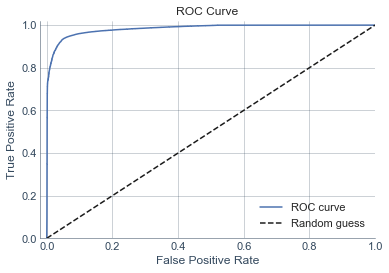

In [889]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_prob = logreg.predict_proba(test_X)[:,1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

###### AUC Score

In [890]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y, y_pred_prob)

0.9836114056257045

In [891]:
#The AUC is close to 1 means that our classifier is very good at
#minimizing false negatives and true negatives 

###### Precision Recall Curve

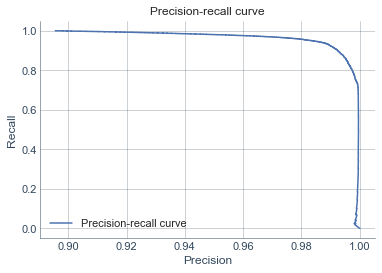

In [892]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(test_y, y_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

###### LogReg Recursive Feature Elimination

In [893]:
#Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and 
#choose either the best or worst performing feature, setting the feature aside and then repeating the 
#process with the rest of the features. This process is applied until all features in the dataset are exhausted. 
#The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [894]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(train_X, train_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Defau

[ True  True  True  True  True False False  True  True  True False  True
 False  True  True  True False  True False  True  True  True  True  True
  True False  True]
[1 1 1 1 1 3 5 1 1 1 8 1 4 1 1 1 6 1 2 1 1 1 1 1 1 7 1]


In [895]:
#need to test subset as well if I get better results

## Bootstrapped Decision Trees

In [896]:
bagging = BaggingClassifier(n_estimators=50)
bagging.fit(train_X,train_y)
y_pred_bag = bagging.predict(test_X)
print('Accuracy of Bagging classifier on test set: {:.2f}'.format(bagging.score(test_X, test_y)))

Accuracy of Bagging classifier on test set: 0.98


###### Confusion Matrix

In [897]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, y_pred_bag)
print(confusion_matrix)

[[12410   704]
 [  689 59406]]


###### Classification Report

In [898]:
print(classification_report(test_y, y_pred_bag))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     13114
           1       0.99      0.99      0.99     60095

   micro avg       0.98      0.98      0.98     73209
   macro avg       0.97      0.97      0.97     73209
weighted avg       0.98      0.98      0.98     73209



###### ROC Curve

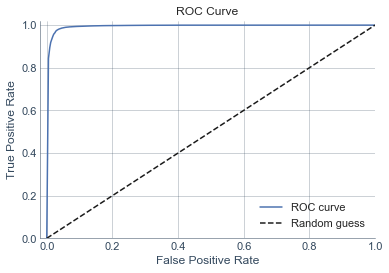

In [899]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_prob = bagging.predict_proba(test_X)[:,1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

###### PR Curve

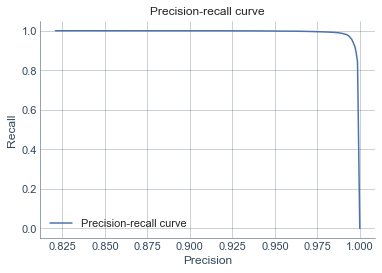

In [900]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(test_y, y_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

## Random Forest Classifier

Accuracy of Random Forest classifier on test set: 0.98
[[12052  1062]
 [  807 59288]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     13114
           1       0.98      0.99      0.98     60095

   micro avg       0.97      0.97      0.97     73209
   macro avg       0.96      0.95      0.96     73209
weighted avg       0.97      0.97      0.97     73209



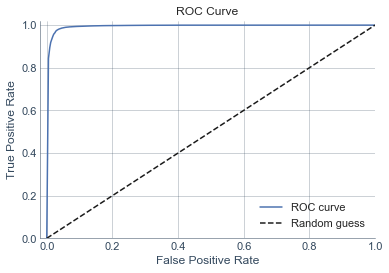

In [901]:
RF = RandomForestClassifier(n_estimators=50)
RF.fit(train_X,train_y)
y_pred_rf = RF.predict(test_X)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(bagging.score(test_X, test_y)))

###### Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, y_pred_rf)
print(confusion_matrix)

###### Classification Report

print(classification_report(test_y, y_pred_rf))

###### ROC Curve

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_prob = bagging.predict_proba(test_X)[:,1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")



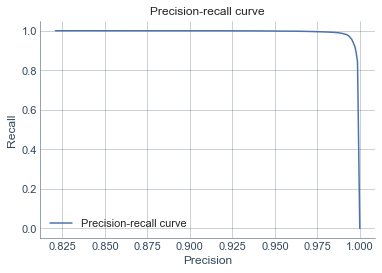

In [902]:
###### PR Curve

from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(test_y, y_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

## Gradient Boosting Classifier

Accuracy of Gradient Boosting classifier on test set: 0.96
[[11430  1684]
 [ 1254 58841]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89     13114
           1       0.97      0.98      0.98     60095

   micro avg       0.96      0.96      0.96     73209
   macro avg       0.94      0.93      0.93     73209
weighted avg       0.96      0.96      0.96     73209



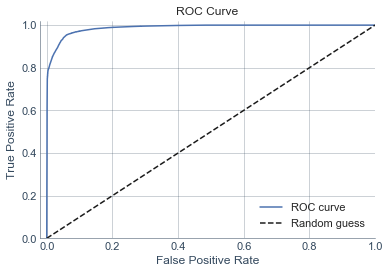

In [903]:
gbm = GradientBoostingClassifier(n_estimators=50)
gbm.fit(train_X,train_y)
y_pred_gbm = gbm.predict(test_X)
print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'.format(gbm.score(test_X, test_y)))

###### Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, y_pred_gbm)
print(confusion_matrix)

###### Classification Report

print(classification_report(test_y, y_pred_gbm))

###### ROC Curve

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_prob = gbm.predict_proba(test_X)[:,1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")



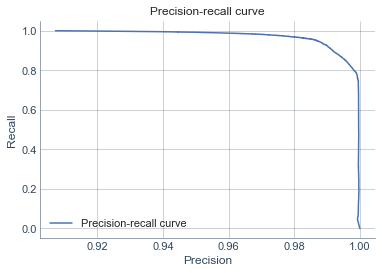

In [904]:
###### PR Curve

from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(test_y, y_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

### Ada Boost

Accuracy of Gradient Boosting classifier on test set: 0.96
[[11205  1909]
 [ 1209 58886]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88     13114
           1       0.97      0.98      0.97     60095

   micro avg       0.96      0.96      0.96     73209
   macro avg       0.94      0.92      0.93     73209
weighted avg       0.96      0.96      0.96     73209



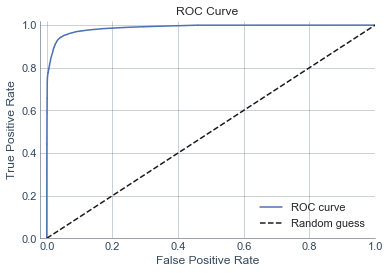

In [905]:
ada = AdaBoostClassifier(n_estimators=50)
ada.fit(train_X,train_y)
y_pred_ada = ada.predict(test_X)
print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'.format(ada.score(test_X, test_y)))

###### Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, y_pred_ada)
print(confusion_matrix)

###### Classification Report

print(classification_report(test_y, y_pred_ada))

###### ROC Curve

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_prob = ada.predict_proba(test_X)[:,1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")



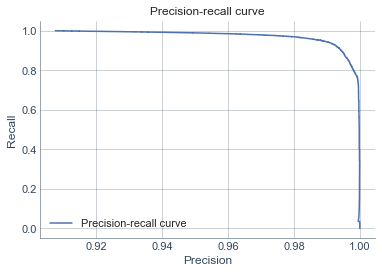

In [906]:
###### PR Curve

from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(test_y, y_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

### Undersampling the majority class (fully paid)

In [907]:
def undersample(data, n=1):
    positive_samples = df[df[y] == 0].copy().apply(np.random.permutation)
    negative_samples = df[df[y] == 1].copy().apply(np.random.permutation).head(positive_samples.shape[0] * n)

    undersampled_data = pd.concat([positive_samples, negative_samples])

    u_train_X, u_test_X, u_train_y, u_test_y = train_test_split(undersampled_data[X], undersampled_data[y], test_size=0.3)
    print('% Default: ', undersampled_data[undersampled_data[y] == 0].shape[0] / undersampled_data.shape[0] * 100)
    print('Train - size:', u_train_y.shape[0], ', %Default:', u_train_y[u_train_y == 1].shape[0] / u_train_y.shape[0] * 100)
    print('Test - size:', u_test_y.shape[0], ', %Default: ', u_test_y[u_test_y == 1].shape[0] / u_test_y.shape[0] * 100)
    
    return u_train_X, u_test_X, u_train_y, u_test_y

u_train_X, u_test_X, u_train_y, u_test_y = undersample(df, 1)

% Default:  50.0
Train - size: 61357 , %Default: 50.061117720879444
Test - size: 26297 , %Default:  49.85739818230216


###### Fit all the models and show results side by side

In [908]:
def all_classifiers_results(classname, classifier):
    model=classifier.fit(train_X, train_y)
    model_underfit = classifier.fit(u_train_X,u_train_y)
    pr1 = model.predict(test_X) #predicted class
    pr1_underfit = model.predict(u_test_X)
    print(classname, metrics.classification_report(test_y, pr1))
    print(metrics.confusion_matrix(test_y,pr1))
    
    print("--------------------------------------")
    print(classname+' undersampling', metrics.classification_report(u_test_y, pr1_underfit))
    print(metrics.confusion_matrix(u_test_y,pr1_underfit))
    print("--------------------------------------")


In [909]:
all_classifiers_results("Bootstrapped Decision Trees ", BaggingClassifier(n_estimators=50))
all_classifiers_results("Random Forest", RandomForestClassifier(n_estimators=50))
all_classifiers_results("Gradient BoostingClassifier", GradientBoostingClassifier(n_estimators=50))
all_classifiers_results("AdaBoost Classifier", AdaBoostClassifier(n_estimators=50))
all_classifiers_results("Logistic Regression", LogisticRegression())

Bootstrapped Decision Trees                precision    recall  f1-score   support

           0       0.69      0.89      0.77     13114
           1       0.97      0.91      0.94     60095

   micro avg       0.91      0.91      0.91     73209
   macro avg       0.83      0.90      0.86     73209
weighted avg       0.92      0.91      0.91     73209

[[11626  1488]
 [ 5305 54790]]
--------------------------------------
Bootstrapped Decision Trees  undersampling               precision    recall  f1-score   support

           0       0.90      0.95      0.92     13186
           1       0.94      0.89      0.92     13111

   micro avg       0.92      0.92      0.92     26297
   macro avg       0.92      0.92      0.92     26297
weighted avg       0.92      0.92      0.92     26297

[[12497   689]
 [ 1406 11705]]
--------------------------------------
Random Forest               precision    recall  f1-score   support

           0       0.69      0.88      0.77     13114
           

/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression               precision    recall  f1-score   support

           0       0.67      0.85      0.75     13114
           1       0.97      0.91      0.94     60095

   micro avg       0.90      0.90      0.90     73209
   macro avg       0.82      0.88      0.84     73209
weighted avg       0.91      0.90      0.90     73209

[[11184  1930]
 [ 5413 54682]]
--------------------------------------
Logistic Regression undersampling               precision    recall  f1-score   support

           0       0.90      0.93      0.92     13186
           1       0.93      0.90      0.91     13111

   micro avg       0.91      0.91      0.91     26297
   macro avg       0.92      0.91      0.91     26297
weighted avg       0.92      0.91      0.91     26297

[[12296   890]
 [ 1354 11757]]
--------------------------------------


In [910]:
def all_classifiers_results(classname, classifier):
    model=classifier.fit(train_X, train_y)
    model_underfit = classifier.fit(u_train_X,u_train_y)
    pr1 = model.predict(test_X) #predicted class
    pr1_underfit = model.predict(u_test_X)
    print(classname, metrics.classification_report(test_y, pr1))
    print(metrics.confusion_matrix(test_y,pr1))
    
    print(--------------------------------------)
    print(classname, metrics.classification_report(u_test_y, pr1_underfit))
    print(metrics.confusion_matrix(u_test_y,pr1_underfit))
    


SyntaxError: invalid syntax (<ipython-input-910-5142ae20b9ca>, line 9)

In [ ]:
plot_PR_curve_noadj("Bootstrapped Decision Trees ", BaggingClassifier(n_estimators=50))
plot_PR_curve_noadj("Random Forest", RandomForestClassifier(n_estimators=50))
plot_PR_curve_noadj("Gradient BoostingClassifier", GradientBoostingClassifierGra(n_estimators=50))
plot_PR_curve_noadj("AdaBoost Classifier", AdaBoostClassifier(n_estimators=50))
plot_PR_curve_noadj("Logistic Regression", LogisticRegression(C=0.0001, n_jobs=1, class_weight = 'balanced'))